Import the required packages:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

We are going to apply image compression to this simple image:

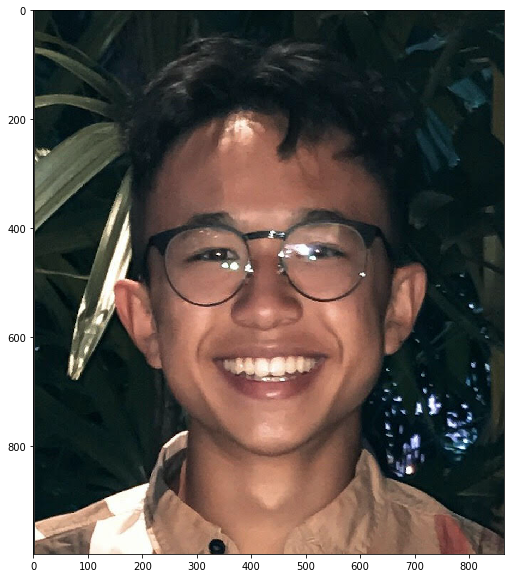

In [13]:
img = mpimg.imread('images/Profile.png')
plt.imshow(img)

If you try printing the image variable, you will get a matrix:

In [14]:
print(img)

[[[0.19607843 0.19607843 0.19607843 1.        ]
  [0.19607843 0.19607843 0.19607843 1.        ]
  [0.19607843 0.19607843 0.19607843 1.        ]
  ...
  [0.05098039 0.11372549 0.10980392 1.        ]
  [0.05098039 0.11372549 0.10980392 1.        ]
  [0.05098039 0.11372549 0.10980392 1.        ]]

 [[0.19607843 0.19607843 0.19607843 1.        ]
  [0.19607843 0.19607843 0.19607843 1.        ]
  [0.19607843 0.19607843 0.19607843 1.        ]
  ...
  [0.05490196 0.11764706 0.11372549 1.        ]
  [0.05490196 0.11764706 0.11372549 1.        ]
  [0.05490196 0.11764706 0.11372549 1.        ]]

 [[0.19607843 0.19607843 0.19607843 1.        ]
  [0.19607843 0.19607843 0.19607843 1.        ]
  [0.19607843 0.19607843 0.19607843 1.        ]
  ...
  [0.05098039 0.11764706 0.11372549 1.        ]
  [0.05098039 0.11764706 0.11372549 1.        ]
  [0.05098039 0.11764706 0.11372549 1.        ]]

 ...

 [[0.19607843 0.19607843 0.19607843 1.        ]
  [0.19607843 0.19607843 0.19607843 1.        ]
  [0.19607

What does this matrix correspond to? It is a three dimensional matrix of size 113x120x3, where each of the 113x120 pixels in the image corresponds to a given red, green, and blue decimal value that gives that pixel its color:

In [15]:
print(len(img))
print(len(img[0]))
print(len(img[0][0]))

998
864
4


Let us first convert the three dimensional color matrix to a two dimensional gray scale matrix by applying the following function:

size of matrix =  998 864
rank of matrix = 864


Text(0.5, 1.0, 'Original image, rank= 864')

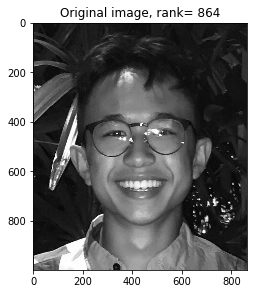

In [16]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gray = rgb2gray(img)
print('size of matrix = ',len(gray),len(gray[0]))
rank=min(len(gray),len(gray[0]))
print('rank of matrix =',rank)

plt.rcParams['figure.figsize'] = 10,10
plt.figure(1)
plt.subplot(221)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.title('Original image, rank= %s'%rank)

We see that if we use all 113 eigenvalues in our SVD decomposition, then we will get the exact image. What if we only use a few?

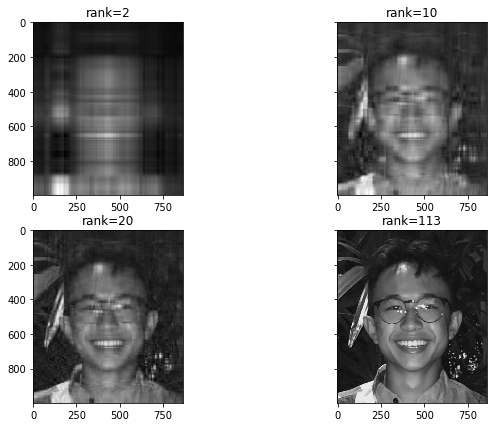

In [17]:
def create_subplot(rank, ax=None):
    A = np.array(gray)
    U, s, V = np.linalg.svd(A, full_matrices=False)
    assert np.allclose(A, np.dot(U, np.dot(np.diag(s), V)))

    s[rank:] = 0
    new_A = np.dot(U, np.dot(np.diag(s), V))
    ax.set_title(f'rank={rank}')
    p = ax.imshow(new_A, cmap = plt.get_cmap('gray'))
    return p


# make figure with subplots
f, axs = plt.subplots(2, 2, sharey=True, figsize=(10,7))
create_subplot(2,axs[0,0])
create_subplot(10,axs[0,1])
create_subplot(20,axs[1,0])
create_subplot(113,axs[1,1])

Notice that using only the largest two real eigenvalues picks up on the OES box and the text across the screen. Using the largest 20 eigenvalues does a very good job of displaying all of the text; it just misses out on some of the white color. SVD is super powerful!!!

### Extension: Research the similarities and differences between SVD and PCA (Principal Component Analysis). They are extremely similar but PCA seems to be more widely used in practice.